# Density & Spice Notebook

In [20]:
import xarray as xr
import numpy as np
import gsw
import matplotlib.pyplot as plt

In [32]:
so_ds=xr.open_dataset("202206_lon:(30,40)_lat:(-55,-50).nc")

In [33]:
so_ds['SA']=gsw.SA_from_SP(so_ds.PSAL,so_ds.PRES,so_ds.LONGITUDE,so_ds.LATITUDE)
so_ds['CT']=gsw.CT_from_t(so_ds.PSAL,so_ds.TEMP,so_ds.PRES)
so_ds['DENSITY']=gsw.rho(so_ds.SA,so_ds.CT,so_ds.PRES)
so_ds['SPICE']=gsw.spiciness0(so_ds.SA,so_ds.CT)

In [34]:
so_ds

<xarray.Dataset>
Dimensions:                (N_PROF: 2066, N_LEVELS: 1006)
Coordinates:
  * N_PROF                 (N_PROF) int64 0 20 1 21 2 ... 2064 751 720 1818 2065
  * N_LEVELS               (N_LEVELS) int64 0 1 2 3 4 ... 1002 1003 1004 1005
    TIME                   (N_PROF) datetime64[ns] ...
    LATITUDE               (N_PROF) float64 ...
    LONGITUDE              (N_PROF) float64 ...
Data variables: (12/17)
    CONFIG_MISSION_NUMBER  (N_PROF) int32 ...
    CYCLE_NUMBER           (N_PROF) int32 ...
    DATA_MODE              (N_PROF) object ...
    DIRECTION              (N_PROF) object ...
    PLATFORM_NUMBER        (N_PROF) int32 ...
    POSITION_QC            (N_PROF) int32 ...
    ...                     ...
    TEMP_QC                (N_PROF) int32 ...
    TIME_QC                (N_PROF) int32 ...
    SA                     (N_PROF, N_LEVELS) float64 34.03 34.03 ... nan nan
    CT                     (N_PROF, N_LEVELS) float64 3.579 3.581 ... nan nan
    DENSITY                (N_PROF, N_LEVELS) float64 1.027e+03 ... nan
    SPICE                  (N_PROF, N_LEVELS) float64 -0.4937 -0.4928 ... nan
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/202206-ArgoData
    Fetched_by:           amf2288
    Fetched_date:         2022/07/19
    Fetched_constraints:  [x=30.00/40.00; y=-55.00/-50.00; z=0.0/2000.0]
    Fetched_uri:          /swot/SUM05/dbalwada/202206-ArgoData/dac/coriolis/6...
    history:              Variables filtered according to DATA_MODE; Variable...

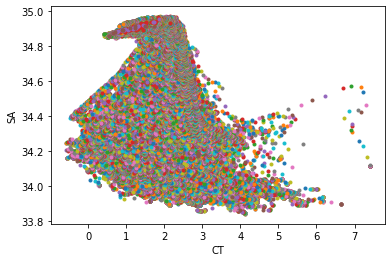

In [26]:
plt.plot(so_ds.CT, so_ds.SA, '.')
plt.xlabel('CT')
plt.ylabel('SA');

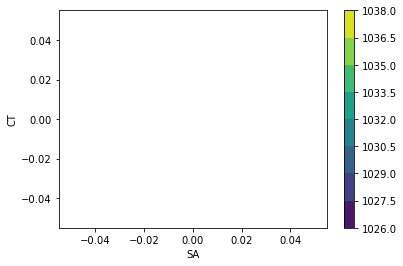

In [35]:
plt.contourf(so_ds.SA, so_ds.CT, so_ds.DENSITY)
plt.xlabel('SA')
plt.ylabel('CT')
plt.colorbar()

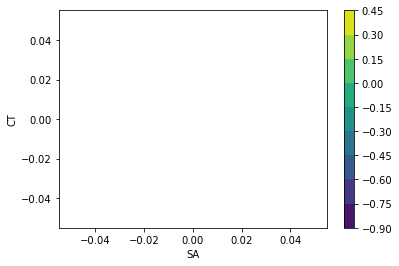

In [36]:
plt.contourf(so_ds.SA, so_ds.CT, so_ds.SPICE)
plt.xlabel('SA')
plt.ylabel('CT')
plt.colorbar()

<a list of 2298 text.Text objects>

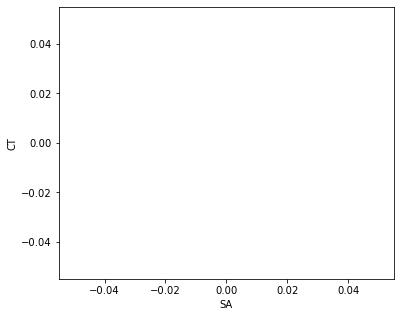

In [37]:
fig, ax = plt.subplots(figsize=(6,5))

Dplt = ax.contour(so_ds.SA, so_ds.CT, so_ds.DENSITY)
Splt = ax.contour(so_ds.SA, so_ds.CT, so_ds.SPICE)
plt.xlabel('SA')
plt.ylabel('CT')
ax.clabel(Dplt)
ax.clabel(Splt)